### Import libraries and create data frame

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, roc_auc_score

# Prepare Data

In [46]:
stroke_df = pd.read_csv("Resources/healthcare-dataset-stroke-data.csv")
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [47]:
'''
# Standardize Data Formats
# Convert categorical columns to 'category' type
stroke_df['gender'] = stroke_df['gender'].str.lower().astype('category')
stroke_df['ever_married'] = stroke_df['ever_married'].str.lower().astype('category')
stroke_df['work_type'] = stroke_df['work_type'].str.lower().astype('category')
stroke_df['Residence_type'] = stroke_df['Residence_type'].str.lower().astype('category')
stroke_df['smoking_status'] = stroke_df['smoking_status'].str.lower().astype('category')
'''

"\n# Standardize Data Formats\n# Convert categorical columns to 'category' type\nstroke_df['gender'] = stroke_df['gender'].str.lower().astype('category')\nstroke_df['ever_married'] = stroke_df['ever_married'].str.lower().astype('category')\nstroke_df['work_type'] = stroke_df['work_type'].str.lower().astype('category')\nstroke_df['Residence_type'] = stroke_df['Residence_type'].str.lower().astype('category')\nstroke_df['smoking_status'] = stroke_df['smoking_status'].str.lower().astype('category')\n"

In [48]:
# Ensure Consistency
# Convert 'id' to string 
stroke_df['id'] = stroke_df['id'].astype(str)

In [49]:
# Display the cleaned DataFrame and its data types
display(stroke_df.head())
print(stroke_df.dtypes)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


id                    object
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [50]:
stroke_df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

### Split into X and y

In [51]:
X = stroke_df.drop(columns=['id', 'stroke'])
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked


In [52]:
y = stroke_df['stroke']

### Train test split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [54]:
X_train.isna().sum()/len(stroke_df)

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  0.029941
smoking_status       0.000000
dtype: float64

In [55]:
(X_train['smoking_status'] == 'Unknown').sum()/len(stroke_df)

0.22857142857142856

In [56]:
# Handle Missing Values
# Fill missing values in the 'bmi' column with the mean
X_train['bmi'] = X_train['bmi'].fillna(stroke_df['bmi'].mean())

In [57]:
X_train.isna().sum()/len(stroke_df)

gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
dtype: float64

In [58]:
X_train.loc[X_train['smoking_status'] == 'Unknown'].describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,30.671267,0.035103,0.031678,98.730385,25.742011
std,25.336018,0.184118,0.175217,36.309063,7.833756
min,0.080000,0.000000,0.000000,55.280000,10.300000
25%,8.000000,0.000000,0.000000,76.465000,19.600000
50%,23.000000,0.000000,0.000000,89.260000,24.900000
75%,52.000000,0.000000,0.000000,109.047500,29.800000
max,82.000000,1.000000,1.000000,260.850000,97.600000


In [59]:
X_train.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi
count,3832.000000,3832.000000,3832.000000,3832.000000,3832.000000
mean,43.280021,0.098121,0.054541,105.521550,28.961108
std,22.585163,0.297517,0.227111,45.224729,7.651613
min,0.080000,0.000000,0.000000,55.120000,10.300000
25%,25.000000,0.000000,0.000000,76.607500,23.900000
50%,45.000000,0.000000,0.000000,91.185000,28.450000
75%,61.000000,0.000000,0.000000,113.495000,32.825000
max,82.000000,1.000000,1.000000,271.740000,97.600000


<Axes: ylabel='Frequency'>

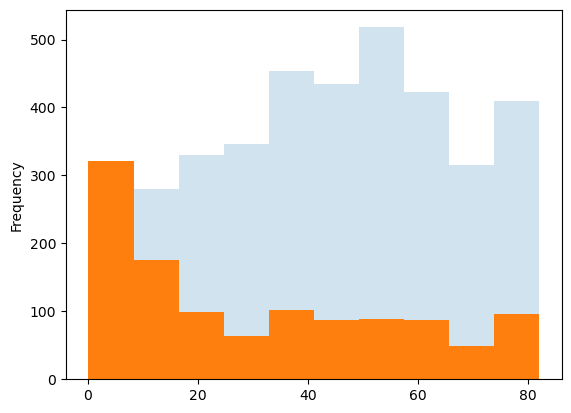

In [60]:
X_train['age'].plot(kind='hist',alpha=0.2)
X_train.loc[stroke_df['smoking_status'] == 'Unknown', 'age'].plot(kind='hist')

In [61]:
# We will assume most of the unknown values below the legal smoking age fall into the never smoked category
for index, row in X_train.iterrows():
    if row['age'] <= 18:
        X_train.at[index, 'smoking_status'] = 'never smoked'

(X_train['smoking_status'] == 'Unknown').sum()/len(stroke_df)

0.1232876712328767

In [62]:
'''
for x in stroke_df:
    display(stroke_df[x].value_counts())
'''

'\nfor x in stroke_df:\n    display(stroke_df[x].value_counts())\n'

## Encode the dataset

In [63]:
#encode# List 
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

#One-Hot Encoding with pd.get_dummies
X_train_encoded = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)

#Check the data
X_train_encoded.head()


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
1914,43.0,0,0,77.86,28.9,True,True,False,True,False,False,False,False,True,False
1751,65.0,0,0,88.82,28.2,False,True,False,True,False,False,True,True,False,False
396,60.0,1,0,213.37,36.0,True,True,False,True,False,False,False,False,True,False
1783,2.0,0,0,65.67,16.6,True,False,False,False,False,True,False,False,True,False
2361,30.0,0,0,101.98,23.2,False,True,False,True,False,False,True,False,False,False


In [64]:
X_test_encoded.head()
X_test_encoded['gender_Other'].value_counts()
X_test_encoded = X_test_encoded.drop(columns= 'gender_Other', axis=1)

## Random Oversampling

In [65]:
# Import RandomOverSampler from imblearn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the RandomOverSampler instance
random_oversampler = RandomOverSampler(random_state=1)

# Fit the data to the model
X_resampled, y_resampled = random_oversampler.fit_resample(X_train_encoded, y_train)


In [66]:
# Count distinct resampled values
y_resampled.value_counts()

stroke
0    3658
1    3658
Name: count, dtype: int64

In [67]:
# 
X_train_encoded

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
1914,43.0,0,0,77.86,28.9,True,True,False,True,False,False,False,False,True,False
1751,65.0,0,0,88.82,28.2,False,True,False,True,False,False,True,True,False,False
396,60.0,1,0,213.37,36.0,True,True,False,True,False,False,False,False,True,False
1783,2.0,0,0,65.67,16.6,True,False,False,False,False,True,False,False,True,False
2361,30.0,0,0,101.98,23.2,False,True,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,46.0,0,0,137.77,29.3,True,True,False,True,False,False,True,False,True,False
2763,45.0,0,0,63.73,32.0,False,True,False,True,False,False,False,False,False,False
905,31.0,0,0,76.26,35.6,False,True,False,True,False,False,False,False,True,False
3980,45.0,0,0,218.10,55.0,False,True,False,True,False,False,False,False,False,True


In [68]:
# Define and train the XGBoost model
xgb_model = XGBClassifier(
    scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),
    learning_rate=0.1,
    n_estimators=200,
    max_depth=3,
    random_state=42
)
xgb_model.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [69]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_encoded, y_train)# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_encoded, y_train)

In [70]:
gradient_boosting_model = GradientBoostingClassifier(
    learning_rate=0.1,
    n_estimators=200,
    max_depth=3,
    random_state=42
)
gradient_boosting_model.fit(X_resampled, y_resampled)

GradientBoostingClassifier(n_estimators=200, random_state=42)

In [71]:
# Evaluate the model
y_pred = xgb_model.predict(X_test_encoded)
y_pred_proba = xgb_model.predict_proba(X_test_encoded)[:, 1]

In [72]:
# Make predictions for testing features
#y_pred = model.predict(X_test_encoded)
# Predict on test set
y_pred = xgb_model.predict(X_test_encoded)
y_pred_proba = xgb_model.predict_proba(X_test_encoded)[:, 1]

In [73]:
# Print the classification reports for the two models
#print(classification_report(y_test, y_pred))
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred_proba))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.70      0.81      1203
           1       0.12      0.65      0.20        75

    accuracy                           0.70      1278
   macro avg       0.54      0.68      0.51      1278
weighted avg       0.92      0.70      0.78      1278

AUC-ROC Score: 0.7581435300637296
